In [ ]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [ ]:
# 2. Получение и чтение файла из облака
url = "https://drive.google.com/uc?export=download&id=1yXG1DETrBHogViDHB0qnMQqGlUzmENW1"
input_df = pd.read_excel(url, header = 0, index_col = 0,nrows=744)
input_df.head()

,HH:MM (LST),Zenith (deg),ETR (Wh/m^2)
YYYY-MM-DD,,,
2010-01-01,01:00:00,99.0,0
2010-01-01,02:00:00,99.0,0
2010-01-01,03:00:00,99.0,0
2010-01-01,04:00:00,99.0,0
2010-01-01,05:00:00,99.0,0


In [ ]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,HH:MM (LST),Zenith (deg),ETR (Wh/m^2)
YYYY-MM-DD,,,
2010-01-31,20:00:00,99.0,0
2010-01-31,21:00:00,99.0,0
2010-01-31,22:00:00,99.0,0
2010-01-31,23:00:00,99.0,0
2010-01-31,1900-01-01 00:00:00,99.0,0


In [ ]:
# 4. Получение базовых статистических показателей
input_df.describe()

,Zenith (deg),ETR (Wh/m^2)
count,744.000000,744.000000
mean,86.670968,193.705645
std,15.234433,273.090662
min,55.500000,0.000000
25%,72.775000,0.000000
50%,99.000000,0.000000
75%,99.000000,419.000000
max,99.000000,798.000000


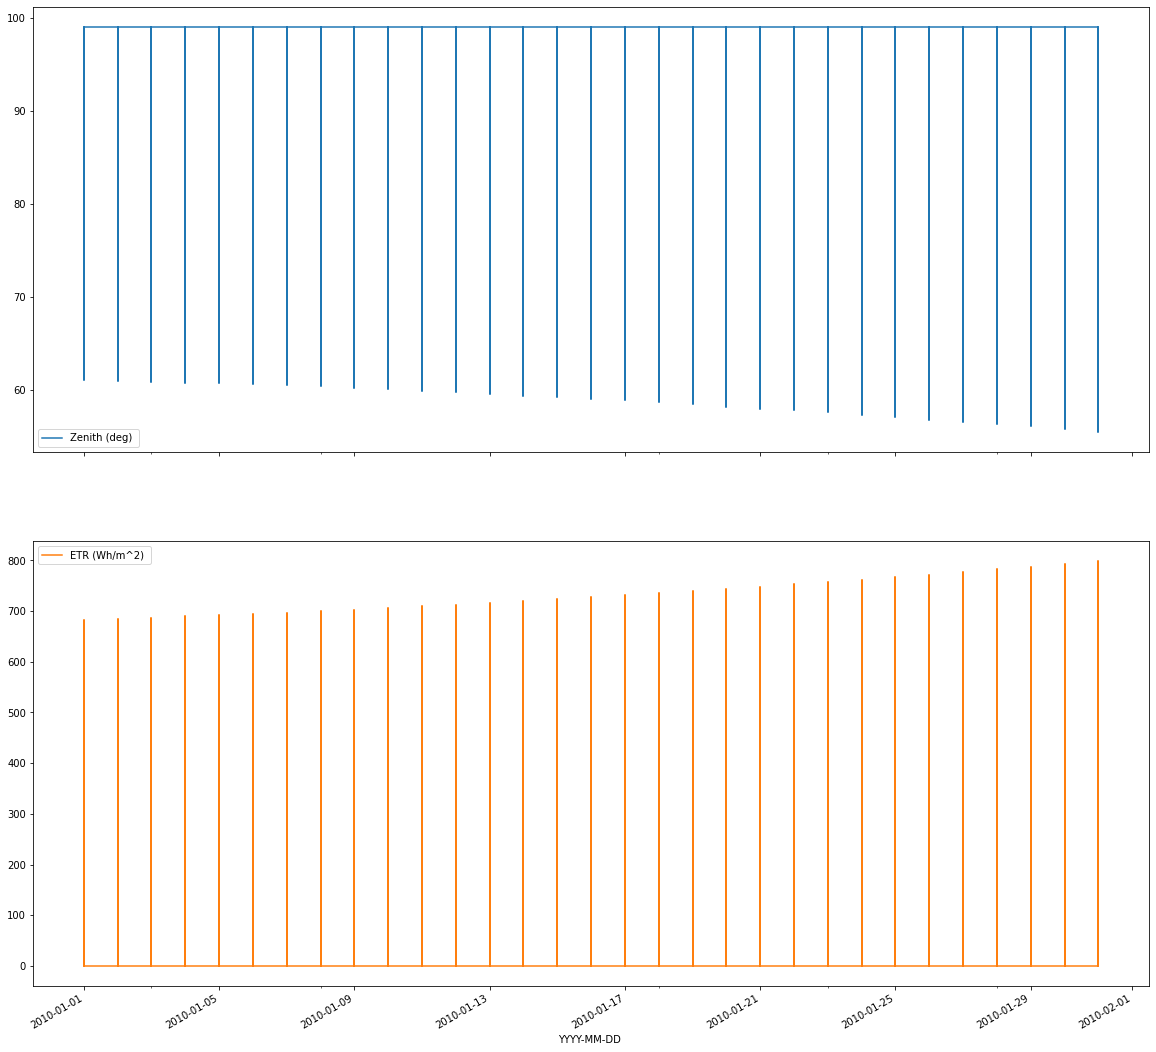

In [ ]:
# 5. 
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

In [ ]:
# 6
input_matrix = input_df.values # перевод таблицы в матрицу
print('размерность матрицы', input_matrix.shape)
print()


размерность матрицы (744, 3)



In [ ]:
print("{: <12} max = {:.2f}".format(input_df.columns[2], input_matrix[ :  , 2].max()))
print("{: <12} mean = {:.2f}".format(input_df.columns[2], input_matrix[ :  , 2].mean()))

ETR (Wh/m^2)  max = 798.00
ETR (Wh/m^2)  mean = 193.71


(744,)


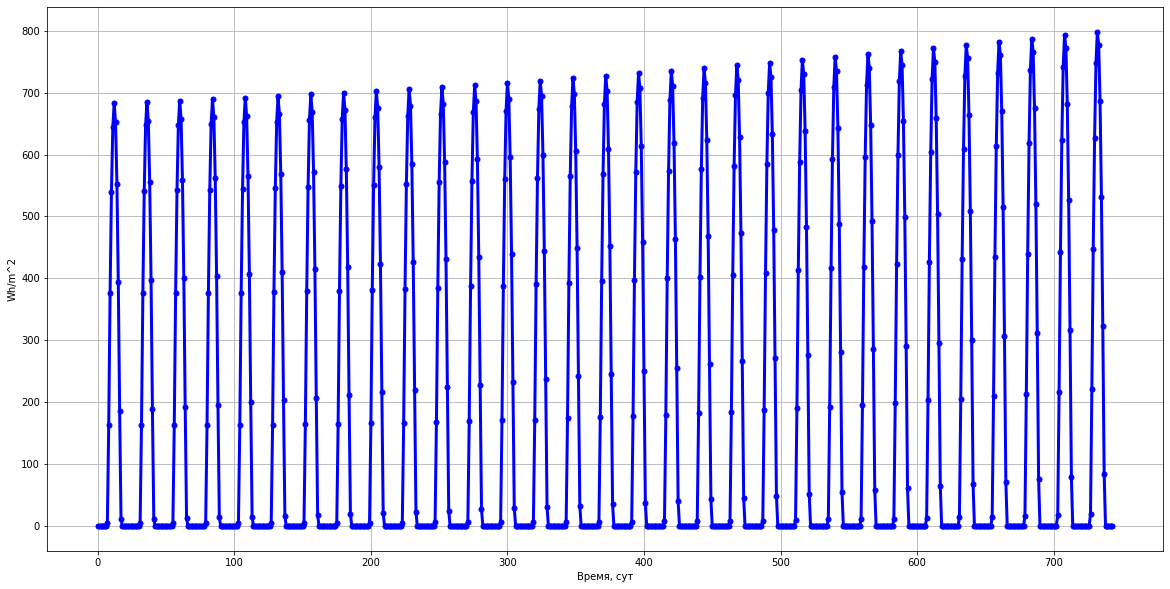

In [ ]:
# 7. 
wind_speed = input_df.iloc[: , 2].values

print(wind_speed.shape)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(wind_speed, linewidth = 3, markersize = 5, marker = 'o', color = 'blue')
ax.grid(True)
ax.set_xlabel('Время, сут') 
ax.set_ylabel('Wh/m^2')

plt.show()

In [ ]:
# 8.

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(wind_speed)), wind_speed, line_width = 2,color = 'blue')
p.scatter(np.arange(len(wind_speed)), wind_speed,color = 'blue')


show(p)

(744,)


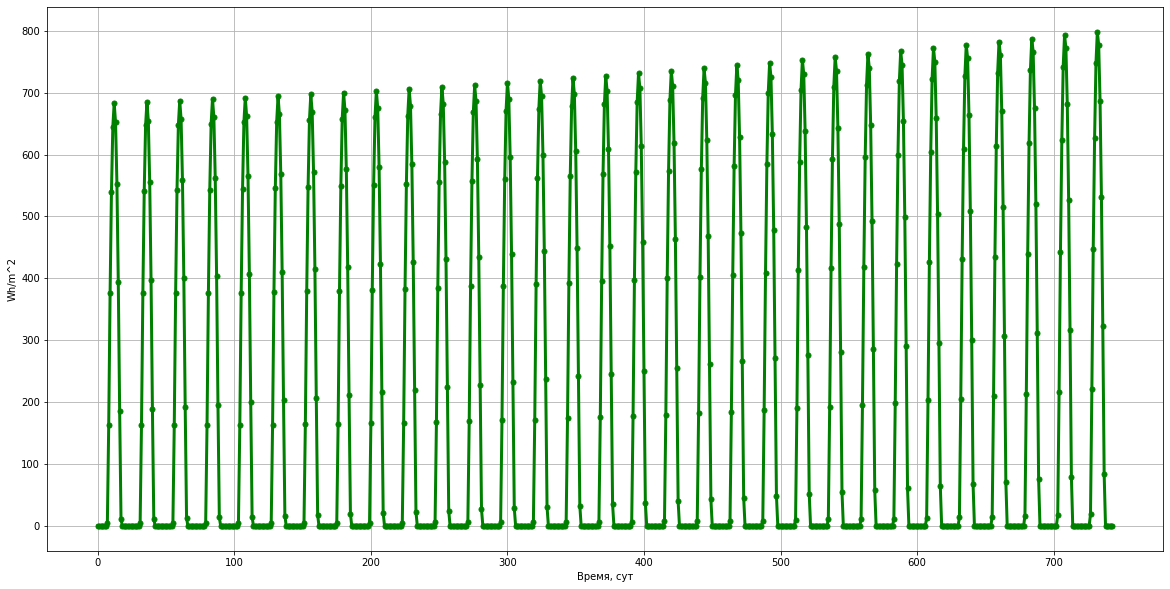

In [ ]:

# 9. 
forecast = input_df.iloc[: , 2].values

print(forecast.shape)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(forecast, linewidth = 3, markersize = 5, marker = 'o', color = 'green')
ax.grid(True)
ax.set_xlabel('Время, сут') 
ax.set_ylabel('Wh/m^2')

plt.show()

In [ ]:
#10.

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(forecast)), forecast, line_width = 2, color = 'green')
p.scatter(np.arange(len(forecast)), forecast, color = 'green')


show(p)

In [22]:
# 
data_frame = pd.DataFrame(forecast)
data_frame.to_excel('forecast.xlsx', index = False)

In [21]:
# 
data_frame = pd.DataFrame(wind_speed)
data_frame.to_excel('wind_speed.xlsx', index = False)